### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable here is whether a given word is congruent or incongruent, i.e whether its ink color matches the color named by the word itself. The dependent variable is the time it takes to name the ink color, which is being tested for change across the two groups (congruent/incongruent). 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Our null hypothesis would posit that on average the time taken to name incongruent words, is no worse than the time taken to name congruent words.
Our alternative hypothesis would posit that the time taken to name incongruent words, is on average longer than the time taken to name congruent words.
Thus the hypothesis is setup as a one-tailed test. Representing this in notation, we get-  
   
H0: $\mu_{incongruent\_time}$ - $\mu_{congruent\_time}$ <= 0  
Ha: $\mu_{incongruent\_time}$ - $\mu_{congruent\_time}$ > 0  

where $\mu_{incongruent\_time}$ is the average time taken to name incongruent words across the entire population (population mean), and $\mu_{congruent\_time}$ is the average time taken to name congruent words across the entire population.
Rewriting this in terms of mean difference $\mu_{D}$:  
H0: $\mu_{D}$ <= 0    
Ha: $\mu_{D}$ > 0  

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

The measure of central tendency we will report here are the average time to name (mean) for the congruent words and the incongruant words, and the average difference between these two means.  
Similarly, the measure of variability we report will be the individual standard deviations in time to name between incongruent words and congruent words, as well the standard deviation of the difference between the two times.

In [1]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv('stroopdata.csv')

In [2]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
N = df.shape[0]
print(N)

24


In [4]:
df.isnull().any()

Congruent      False
Incongruent    False
dtype: bool

In [5]:
df['diff_in_time_to_name'] = df['Incongruent'] - df['Congruent']

In [6]:
(congruent_mean, incongruent_mean) = (np.mean(df['Congruent']), np.mean(df['Incongruent']))
diff_means = np.mean(df['Incongruent']) - np.mean(df['Congruent'])
print("**Central Tendency**")
print("Average time to name words-\n Congruent: %.2f Incongruent: %.2f" % (congruent_mean, incongruent_mean))
print("Average difference in time to name words between Incongruent and Congruent cases: %.2f" % (diff_means))

**Central Tendency**
Average time to name words-
 Congruent: 14.05 Incongruent: 22.02
Average difference in time to name words between Incongruent and Congruent cases: 7.96


In [7]:
df['deviation'] = (df['diff_in_time_to_name'] - diff_means)

In [8]:
df['squared_deviation'] = df['deviation'] * df['deviation']

In [9]:
diff_stdev = math.sqrt(np.sum(df['squared_deviation'])  / (N-1))

In [10]:
print("**Variability**")
# We use np.std for sample stddev since it uses Bessel's correction, with N-1 in denominator by default
(congruent_stdev, incongruent_stdev) = (np.std(df['Congruent']), np.std(df['Incongruent']))
print("Standard deviation of sample times to name words-\n Congruent: %.2f Incongruent: %.2f" % (congruent_stdev, incongruent_stdev))
print("Standard deviation of difference in time to name for incongruent vs congruent case: %.2f"% (diff_stdev))

**Variability**
Standard deviation of sample times to name words-
 Congruent: 3.48 Incongruent: 4.70
Standard deviation of difference in time to name for incongruent vs congruent case: 4.86


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

We will plot the histograms of time to name words for incongruent words and congruent words on top of each other using matplotlib below. We will also indicate the sample averages for the two cases computed above in the same plot as vertical lines

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

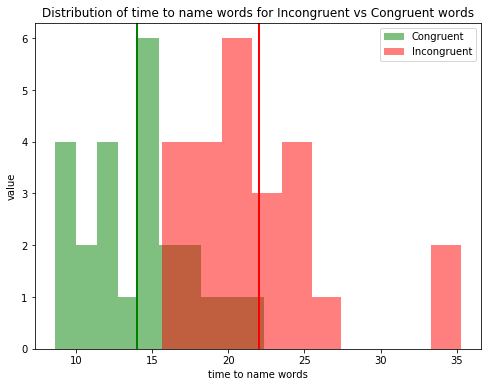

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df['Congruent'], alpha=0.5, label='Congruent', color='Green')
ax.axvline(x=congruent_mean, color='g', linewidth=2)
ax.hist(df['Incongruent'], alpha=0.5, label='Incongruent', color='Red')
ax.axvline(x=incongruent_mean, color='r', linewidth=2)
ax.set_title('Distribution of time to name words for Incongruent vs Congruent words')
ax.set_xlabel('time to name words')
ax.set_ylabel('value')
ax.legend(loc='upper right')
plt.show();

From the above histogram, its clear that not only is the mean time to name word quite higher for the incongruent words compared to congruent words, but the entire distribution is shifted to the right in the case of incongruent words indicating that the higher mean is not due to outliers alone. The incongruent words case also has couple of outliers which makes the right=tail longer for the incongruent case compared to the congruent case, making it more right-skewed. The first standard deviation for the two cases however are relatively close, as indicated in the calculations for the previous question.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Since we know the sample statistics only (and not the population parameters) for a repeated measurement design (same group is subjected to two experiments), we will need to perform a two-sample paired t test to compare the averages to see if they are significantly different from one another. We will determine this using an alpha level of 0.05 (which corresponds to a 95% confidence interval). The sample size is 24 which corresponds to a degree of freedom of 23. Since we're trying to establish in our alternative that the incongruent average times will be higher, we will perform a one-tailed test.
  
Following are the assumptions implicit in paired t-test-  
1) As the sample size and by extension, the degrees of freedom increase, the t distribution approaches standard normal distribution.  
2) In order to apply t-test, the sampling distribution composed of means of samples of a given sample size must be normally distributed.  
3) t-test is applied when the population parameters are not known (unlike the case of z-test) and the two sample t-test is used to estimate how two sample means (which should be the same as their population means) are different from each other knowing only the sample statistics.

The t-critical value for one-tailed t test with alpha value of 0.05, for dof of 23 is 1.714. Therefore for our point estimate to be statistically significant, the corresponding t-statistic must be greater than this t-critical value.

In [13]:
dof = N - 1
SEM = diff_stdev / math.sqrt(N)
t = diff_means / SEM
print("t(%d): %.2f" % (dof, t))

t(23): 8.02


We see that the t-statistic is quite far off into the critical region and is much larger than the t-critical value of 1.714. The corresponding p-value from online calculator is shown to be much less than 0.00001. 

Therefore, the result is statistically significant at p < 0.05. We thus reject the null hypothesis that average time taken to name incongruent words isn't greater than time taken for congruent words. 

These results match up with our expectation based on plotting the histogram of times for the two categories. It does appear that individuals on average take longer to process and name incongruent words compared to congruent words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Since naming an incongruent word involves suppressing the association of color of the characters with the color named by the word, this conflict with muscle memory might result in that additional time taken to confirm and call out the color spelt by the word. Similar tasks might be the improv game "questions only", where participants are not allowed to answer the question posed by other contestants but only respond with more questions. This goes against the trained instinct to try and answer questions to which one might know the answer and the response times in this game might exhibit a similar delay.